In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_excel('Madrid_Houses.xlsx',sheet_name='Datos_Históricos')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   16277 non-null  object 
 12  is_exact_address_hidden       21742 non-null  bool   
 13  s

In [94]:
df.head(5)

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,...,en trÃ¡mite,True,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0


In [95]:
df.isnull().sum()

id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by_area                   0
is_buy_price

In [96]:
df_var = df.isnull().sum()
porcentaje_eliminacion = 0.1
df_var = df_var[df_var<porcentaje_eliminacion*len(df)]
lista_variables_OK = df_var.index
df = df[lista_variables_OK]
df.head(5)

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,neighborhood_id,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,energy_certificate,has_parking
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,2,1.0,False,0.0,Neighborhood 135: San CristÃ³bal (1308.89 â‚¬/...,sale,471.0,False,85000,1328,True,HouseType 1: Pisos,False,0.0,D,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,3,1.0,True,0.0,Neighborhood 132: Los Ãngeles (1796.68 â‚¬/m2...,sale,666.0,False,129900,1856,True,HouseType 1: Pisos,True,0.0,en trÃ¡mite,False
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,2,2.0,False,0.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,722.0,False,144247,1535,True,HouseType 1: Pisos,False,0.0,no indicado,False
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,2,1.0,True,1.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,583.0,False,109900,1717,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,2,2.0,True,0.0,Neighborhood 133: Los Rosales (1827.79 â‚¬/m2)...,sale,1094.0,False,260000,2407,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,True


In [97]:
df.dropna(inplace=True)

In [98]:
df.isnull().sum

<bound method DataFrame.sum of           id  title  subtitle  sq_mt_built  n_rooms  n_bathrooms  \
0      False  False     False        False    False        False   
1      False  False     False        False    False        False   
2      False  False     False        False    False        False   
3      False  False     False        False    False        False   
4      False  False     False        False    False        False   
...      ...    ...       ...          ...      ...          ...   
21736  False  False     False        False    False        False   
21737  False  False     False        False    False        False   
21738  False  False     False        False    False        False   
21739  False  False     False        False    False        False   
21740  False  False     False        False    False        False   

       is_exact_address_hidden  is_floor_under  neighborhood_id  operation  \
0                        False           False            False      False

In [99]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19310.0,10751.771621,6272.883675,2.0,5347.25,10575.5,16243.75,21742.0
sq_mt_built,19310.0,144.126359,125.418617,16.0,71.00,101.0,161.00,999.0
n_rooms,19310.0,3.013361,1.388427,0.0,2.00,3.0,4.00,24.0
n_bathrooms,19310.0,2.039617,1.271573,1.0,1.00,2.0,2.00,14.0
is_floor_under,19310.0,0.118747,0.323499,0.0,0.00,0.0,0.00,1.0
rent_price,19310.0,1573.749995,931.244378,18.0,913.00,1368.0,2073.50,12584.0
buy_price,19310.0,632592.345106,720196.584637,36000.0,200000.00,380000.0,750000.00,8800000.0
buy_price_by_area,19310.0,4061.935008,1917.230783,447.0,2586.00,3783.5,5047.00,18889.0
is_new_development,19310.0,0.060124,0.237723,0.0,0.00,0.0,0.00,1.0


<Figure size 1200x800 with 0 Axes>

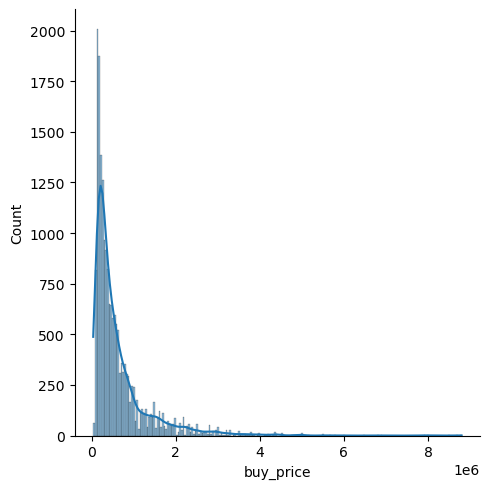

In [100]:
plt.figure(figsize=(12,8))
sns.displot(df['buy_price'], kde=True)

<Axes: xlabel='n_rooms', ylabel='count'>

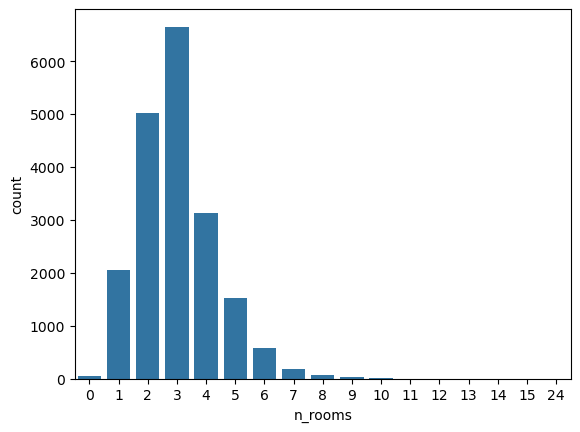

In [101]:
sns.countplot(x='n_rooms', data=df)

In [102]:
df.corr(numeric_only = True)['buy_price'].sort_values()

id                        -0.195828
is_floor_under            -0.149768
is_new_development        -0.013903
is_renewal_needed          0.052132
is_exact_address_hidden    0.167964
has_parking                0.315350
n_rooms                    0.578291
buy_price_by_area          0.581698
n_bathrooms                0.753692
sq_mt_built                0.831700
rent_price                 0.920350
buy_price                  1.000000
is_rent_price_known             NaN
is_buy_price_known              NaN
Name: buy_price, dtype: float64

<Axes: xlabel='buy_price', ylabel='sq_mt_built'>

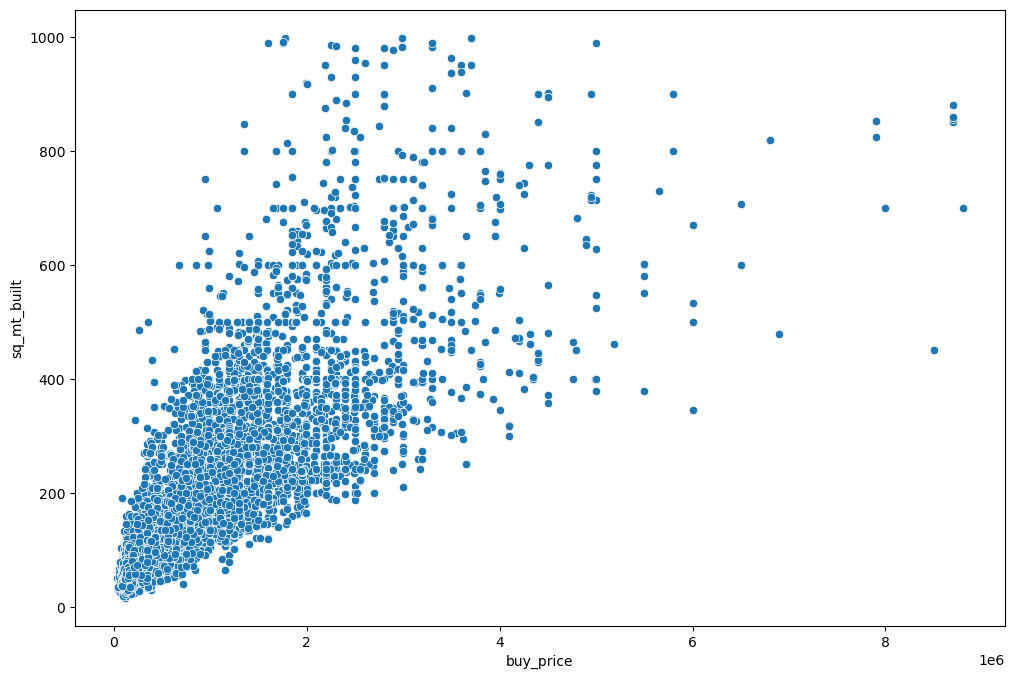

In [103]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='buy_price', y='sq_mt_built',data=df)

<Axes: xlabel='n_bathrooms', ylabel='buy_price'>

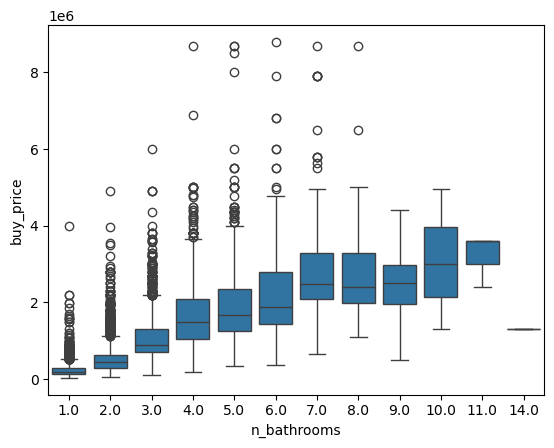

In [104]:
sns.boxplot(x='n_bathrooms', y='buy_price', data=df)

<Axes: xlabel='has_parking', ylabel='buy_price'>

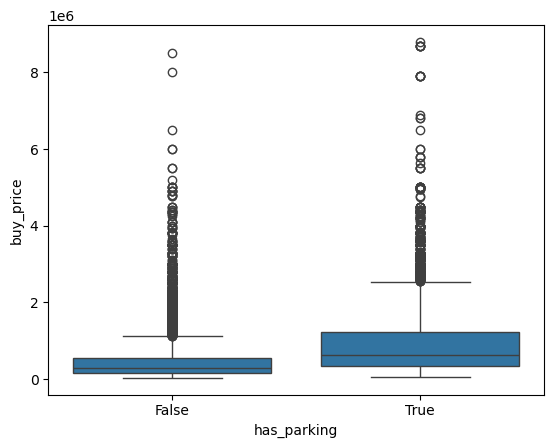

In [105]:
sns.boxplot(x='has_parking', y='buy_price', data=df)

In [106]:
df.drop(['id','title','subtitle', 'is_exact_address_hidden', 'is_renewal_needed', 'neighborhood_id', 'operation', 'is_rent_price_known', 'is_buy_price_known', 'buy_price_by_area', 'house_type_id', 'energy_certificate'], axis=1, inplace=True)

In [107]:
df.head()

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,is_new_development,has_parking
0,64.0,2,1.0,0.0,471.0,85000,0.0,False
1,70.0,3,1.0,0.0,666.0,129900,0.0,False
2,94.0,2,2.0,0.0,722.0,144247,0.0,False
3,64.0,2,1.0,1.0,583.0,109900,0.0,False
4,108.0,2,2.0,0.0,1094.0,260000,0.0,True


In [108]:
X = df.drop('buy_price',axis=1)
y = df['buy_price']

In [109]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [128]:
X_train.shape

(15448, 7)

In [129]:
X_test.shape

(3862, 7)

In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
scaler = MinMaxScaler()

In [132]:
X_train

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,is_new_development,has_parking
2160,87.0,2,1.0,0.0,913.0,0.0,False
13201,150.0,2,2.0,1.0,1839.0,0.0,True
14224,682.0,24,4.0,0.0,6864.0,0.0,False
17339,154.0,5,5.0,0.0,2510.0,0.0,False
5298,70.0,3,1.0,0.0,621.0,0.0,False
...,...,...,...,...,...,...,...
6473,67.0,2,1.0,0.0,762.0,0.0,False
9240,146.0,3,2.0,0.0,2070.0,1.0,True
19993,104.0,2,1.0,0.0,1890.0,0.0,False
20197,85.0,2,2.0,0.0,1197.0,0.0,False


In [133]:
X_train = scaler.fit_transform(X_train)

In [134]:
X_test = scaler.transform(X_test)

In [135]:
X_train.shape

(15448, 7)

In [136]:
X_test.shape

(3862, 7)

In [120]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam 

In [137]:
model = Sequential()

In [138]:
num_neuronas = X_train.shape[1]
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [140]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values), batch_size=128,epochs=200)

Epoch 1/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 923311800320.0000 - val_loss: 850751782912.0000
Epoch 2/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 943892856832.0000 - val_loss: 850747523072.0000
Epoch 3/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 901088542720.0000 - val_loss: 850687492096.0000
Epoch 4/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 906847059968.0000 - val_loss: 850372853760.0000
Epoch 5/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 954609172480.0000 - val_loss: 849408819200.0000
Epoch 6/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 942865645568.0000 - val_loss: 847169716224.0000
Epoch 7/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 912144990208.0000 - val_loss: 842736336896.0000
Epoch 8/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 909461291008.0000 - val_loss: 835111813120.0000
Epoch 9/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 875990679552.0000 - val_loss: 823069769728.0000
Epoch 10/200
121/12

In [141]:
losses = pd.DataFrame(model.history.history)

<Axes: >

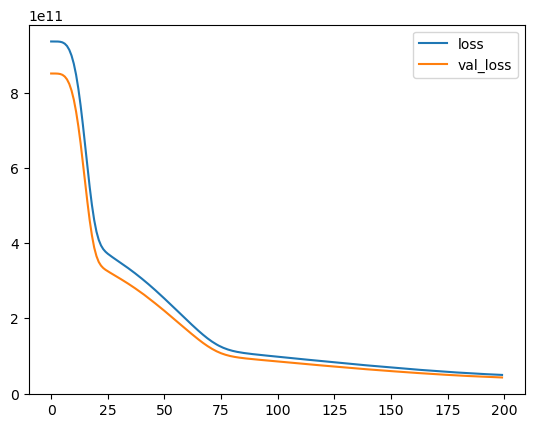

In [142]:
losses.plot()

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [144]:
X_test

array([[0.06313646, 0.125     , 0.        , ..., 0.05618335, 0.        ,
        0.        ],
       [0.13543788, 0.16666667, 0.07692308, ..., 0.15502149, 0.        ,
        1.        ],
       [0.04480652, 0.08333333, 0.        , ..., 0.04830495, 0.        ,
        0.        ],
       ...,
       [0.04480652, 0.04166667, 0.        , ..., 0.09605284, 0.        ,
        0.        ],
       [0.11608961, 0.16666667, 0.07692308, ..., 0.11037721, 0.        ,
        0.        ],
       [0.03665988, 0.04166667, 0.        , ..., 0.08141015, 1.        ,
        0.        ]])

In [145]:
predictions = model.predict(X_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [146]:
mean_absolute_error(y_test,predictions)

115484.51966880827

In [147]:
np.sqrt(mean_squared_error(y_test, predictions))

207729.6122537772

In [148]:
explained_variance_score(y_test,predictions)

0.9075661817895464

In [149]:
mean_absolute_error(y_test,predictions)/df['buy_price'].mean()

0.1825575673847705

In [150]:
mean_absolute_error(y_test,predictions)/df['buy_price'].median()

0.30390663070739016

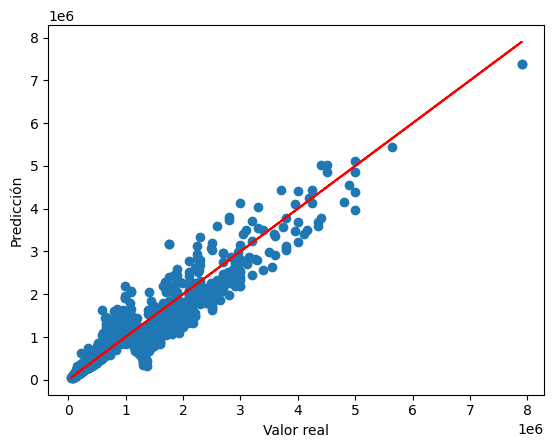

In [151]:
plt.scatter(y_test,predictions)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.plot(y_test,y_test,'r')

In [152]:
errors = y_test.values.reshape(y_test.shape[0],1) - predictions

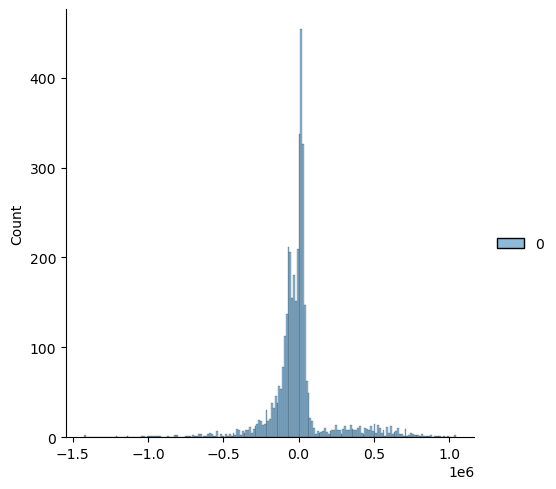

In [153]:
sns.displot(errors)

In [154]:
df_pred = pd.read_excel('Madrid_Houses.xlsx', sheet_name='Datos_Predecir')

In [155]:
df_pred = df_pred[df.columns]
df_pred

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,is_new_development,has_parking
0,65,2,1.0,False,420,NaN,False,False
1,72,3,1.0,False,650,NaN,False,False
2,97,2,2.0,False,730,NaN,False,False
3,63,2,1.0,True,590,NaN,False,False
4,107,2,2.0,False,1000,NaN,False,True
5,125,4,2.0,False,890,NaN,False,True
6,130,5,2.0,False,885,NaN,False,True
7,135,3,2.0,False,912,NaN,False,False
8,76,3,2.0,False,970,NaN,False,True
9,87,2,1.0,False,701,NaN,False,False


In [156]:
X_pred = df_pred.drop('buy_price',axis=1)
X_pred

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,is_new_development,has_parking
0,65,2,1.0,False,420,False,False
1,72,3,1.0,False,650,False,False
2,97,2,2.0,False,730,False,False
3,63,2,1.0,True,590,False,False
4,107,2,2.0,False,1000,False,True
5,125,4,2.0,False,890,False,True
6,130,5,2.0,False,885,False,True
7,135,3,2.0,False,912,False,False
8,76,3,2.0,False,970,False,True
9,87,2,1.0,False,701,False,False


In [158]:
X_pred = scaler.transform(X_pred)
X_pred

array([[0.04989817, 0.08333333, 0.        , 0.        , 0.03199109,
        0.        , 0.        ],
       [0.05702648, 0.125     , 0.        , 0.        , 0.05029445,
        0.        , 0.        ],
       [0.08248473, 0.08333333, 0.07692308, 0.        , 0.05666083,
        0.        , 0.        ],
       [0.04786151, 0.08333333, 0.        , 1.        , 0.04551966,
        0.        , 0.        ],
       [0.09266802, 0.08333333, 0.07692308, 0.        , 0.07814738,
        0.        , 1.        ],
       [0.11099796, 0.16666667, 0.07692308, 0.        , 0.0693936 ,
        0.        , 1.        ],
       [0.11608961, 0.20833333, 0.07692308, 0.        , 0.0689957 ,
        0.        , 1.        ],
       [0.12118126, 0.125     , 0.07692308, 0.        , 0.07114436,
        0.        , 0.        ],
       [0.0610998 , 0.125     , 0.07692308, 0.        , 0.07575999,
        0.        , 1.        ],
       [0.07230143, 0.08333333, 0.        , 0.        , 0.05435302,
        0.        , 0. 

In [159]:
result = model.predict(X_pred)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[ 60554.258],
       [110586.76 ],
       [231242.92 ],
       [110686.75 ],
       [324879.03 ],
       [290831.16 ],
       [282823.7  ],
       [318529.22 ],
       [263578.06 ],
       [157290.3  ]], dtype=float32)

In [160]:
df_pred['PREDICCION']=pd.DataFrame(result)
df_pred

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,is_new_development,has_parking,PREDICCION
0,65,2,1.0,False,420,NaN,False,False,60554.257812
1,72,3,1.0,False,650,NaN,False,False,110586.757812
2,97,2,2.0,False,730,NaN,False,False,231242.921875
3,63,2,1.0,True,590,NaN,False,False,110686.750000
4,107,2,2.0,False,1000,NaN,False,True,324879.031250
5,125,4,2.0,False,890,NaN,False,True,290831.156250
6,130,5,2.0,False,885,NaN,False,True,282823.687500
7,135,3,2.0,False,912,NaN,False,False,318529.218750
8,76,3,2.0,False,970,NaN,False,True,263578.062500
9,87,2,1.0,False,701,NaN,False,False,157290.296875


In [161]:
from tensorflow.keras.models import load_model

In [168]:
model.save('Pred_Model_House.keras', include_optimizer=False)

In [169]:
loaded_model = load_model('Pred_Model_House.keras')